In [67]:
import pandas as pd

import requests

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

base_json=requests.get(url)

df=pd.DataFrame(base_json.json())
df=pd.json_normalize(base_json.json())

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [70]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [71]:
# Encontrado valores vazios em Churn
print((df['Churn'] == '').sum())
df[df['Churn'] == '']

df = df[df['Churn'] != '']
print((df['Churn'] == '').sum())

224
0


In [72]:
df_linha_duplicada = df.duplicated().sum()
df_linha_duplicada

np.int64(0)

In [73]:
#substituindo valores para Bool

colunas_converter = ['Churn', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity',
    'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling'
]

for col in colunas_converter:
    df[col] = df[col].apply(lambda x: True if x == 'Yes' or  x == True else False)


df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].astype(bool)


df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


In [74]:
# Verificando quais informações aparecem nas colunas account.PaymentMethod, account.Contract e internet.InternetService.
print("\n'account.PaymentMethod':", '\n',df['account.PaymentMethod'].value_counts())

print("\n'account.Contract':", '\n', df['account.Contract'].value_counts())

print("\n'internet.InternetService':", '\n',df['internet.InternetService'].value_counts())


'account.PaymentMethod': 
 account.PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

'account.Contract': 
 account.Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

'internet.InternetService': 
 internet.InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   bool   
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   bool   
 4   customer.Partner           7043 non-null   bool   
 5   customer.Dependents        7043 non-null   bool   
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   bool   
 8   phone.MultipleLines        7043 non-null   bool   
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   bool   
 11  internet.OnlineBackup      7043 non-null   bool   
 12  internet.DeviceProtection  7043 non-null   bool   
 13  internet.TechSupport       7043 non-null   bool   
 1

In [76]:
#'account.Charges.Total' tem valores vazios, substituindo pela media dos valores da coluna.
if df['account.Charges.Total'].isna().sum() > 0:
    media_total = df['account.Charges.Total'].mean()
    df['account.Charges.Total'].fillna(media_total, inplace=True)
else:
    print("Sem Null")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   bool   
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   bool   
 4   customer.Partner           7043 non-null   bool   
 5   customer.Dependents        7043 non-null   bool   
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   bool   
 8   phone.MultipleLines        7043 non-null   bool   
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   bool   
 11  internet.OnlineBackup      7043 non-null   bool   
 12  internet.DeviceProtection  7043 non-null   bool   
 13  internet.TechSupport       7043 non-null   bool   
 1

/tmp/ipython-input-416277046.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Total'].fillna(media_total, inplace=True)


In [77]:
# Criando a coluna account.Charges.Daily apartir da coluna account.Charges.Monthly
df['account.Charges.Daily'] = df['account.Charges.Monthly'] / 30

In [78]:
# Renomeando Colunas
novos_nomes = {
    'customerID': 'ID_Cliente',
    'customer.gender': 'Genero_Cliente',
    'customer.SeniorCitizen': 'Senioridade',
    'customer.Partner': 'Tem_Parceiro',
    'customer.Dependents': 'Tem_Dependentes',
    'customer.tenure': 'Meses_Cliente',
    'phone.PhoneService': 'Servico_Telefone',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'internet.InternetService': 'Servico_Internet',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Fatura_Digital',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Charges.Monthly': 'Mensalidade',
    'account.Charges.Total': 'Total_Cobrado',
    'account.Charges.Daily': 'Custo_Diario'
}

df.rename(columns=novos_nomes, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7043 non-null   object 
 1   Churn                 7043 non-null   bool   
 2   Genero_Cliente        7043 non-null   object 
 3   Senioridade           7043 non-null   bool   
 4   Tem_Parceiro          7043 non-null   bool   
 5   Tem_Dependentes       7043 non-null   bool   
 6   Meses_Cliente         7043 non-null   int64  
 7   Servico_Telefone      7043 non-null   bool   
 8   Multiplas_Linhas      7043 non-null   bool   
 9   Servico_Internet      7043 non-null   object 
 10  Seguranca_Online      7043 non-null   bool   
 11  Backup_Online         7043 non-null   bool   
 12  Protecao_Dispositivo  7043 non-null   bool   
 13  Suporte_Tecnico       7043 non-null   bool   
 14  Streaming_TV          7043 non-null   bool   
 15  Streaming_Filmes      7043

### Analise Descritiva

In [79]:
df[['Meses_Cliente', 'Mensalidade', 'Total_Cobrado', 'Custo_Diario']].describe()

,Meses_Cliente,Mensalidade,Total_Cobrado,Custo_Diario
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441,2.158723
std,24.559481,30.090047,2265.000258,1.003002
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.500000,402.225000,1.183333
50%,29.000000,70.350000,1400.550000,2.345000
75%,55.000000,89.850000,3786.600000,2.995000
max,72.000000,118.750000,8684.800000,3.958333


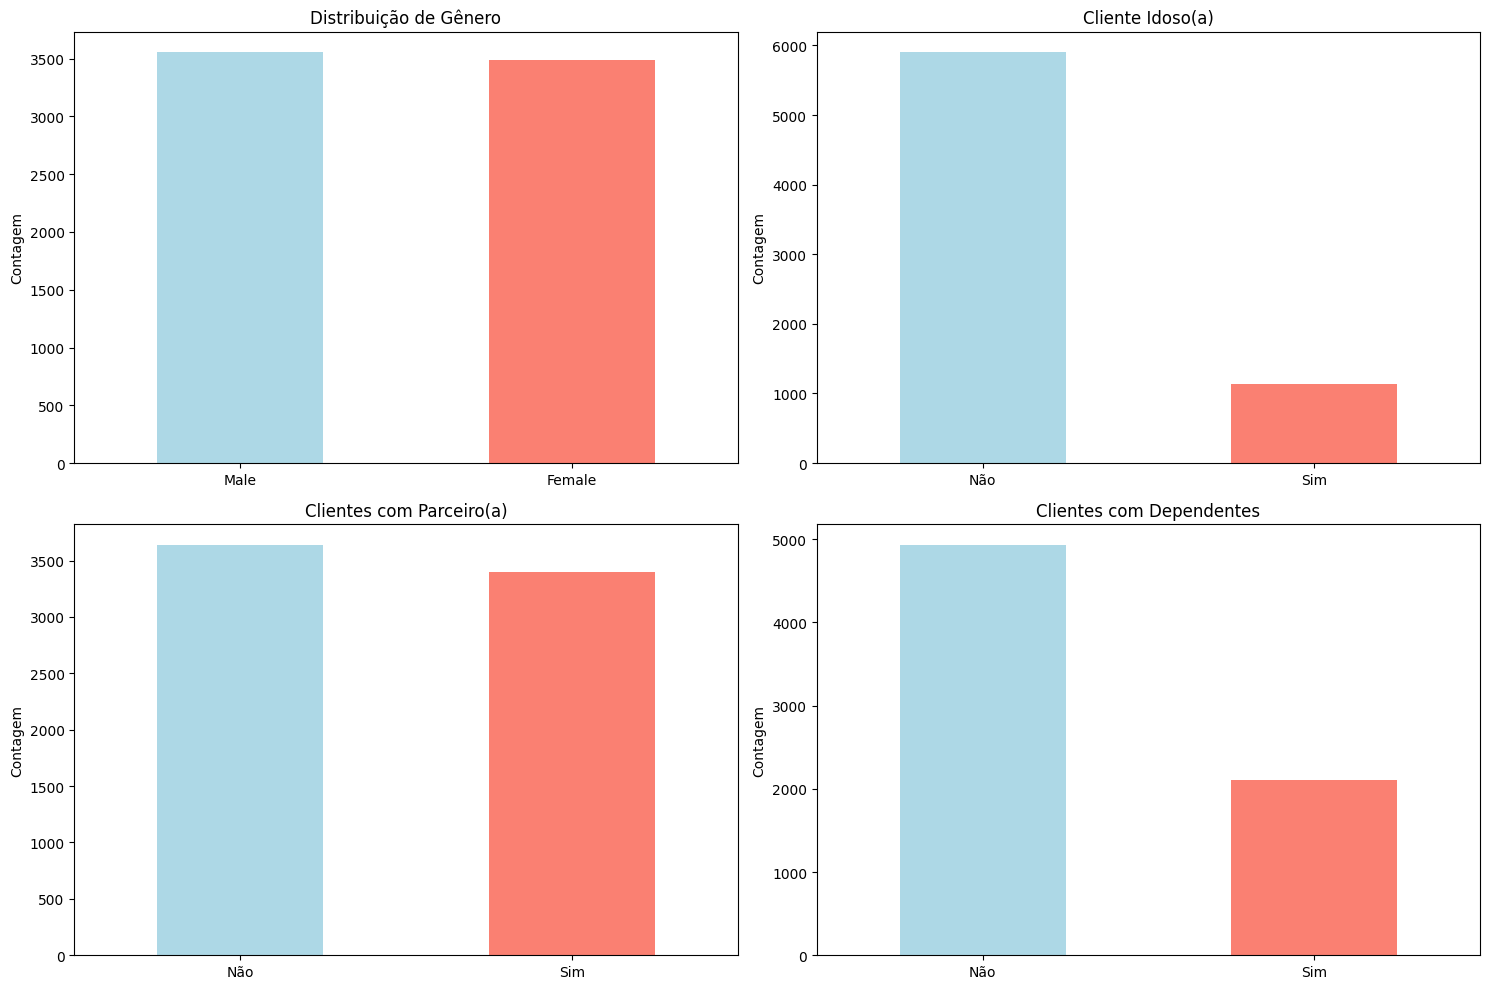

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

titulos = ['Distribuição de Gênero', 'Cliente Idoso(a)', 'Clientes com Parceiro(a)', 'Clientes com Dependentes']
columns_to_plot = ['Genero_Cliente', 'Senioridade', 'Tem_Parceiro', 'Tem_Dependentes']

for i, col in enumerate(columns_to_plot):
    plot_data = df[col].replace({True: 'Sim', False: 'Não'}) if df[col].dtype == bool else df[col]

    plot_counts = plot_data.value_counts()
    plot_counts.plot(kind='bar', ax=axes[i], color=['lightblue', 'salmon'])
    axes[i].set_title(titulos[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Contagem')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

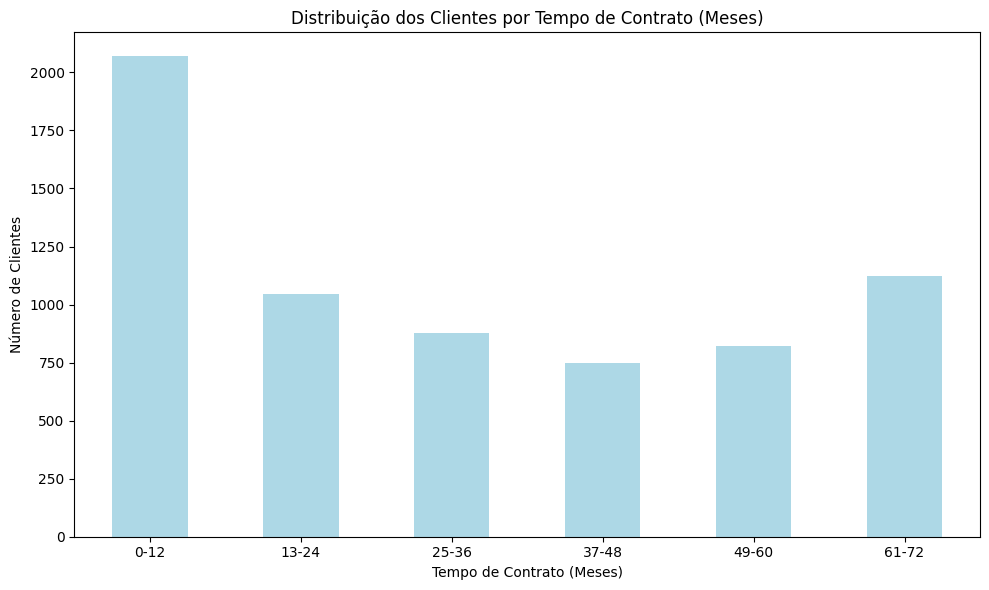

In [81]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
meses_Cliente = pd.cut(df['Meses_Cliente'], bins=bins, labels=labels, right=False)
meses_categoria_counts = meses_Cliente.value_counts().sort_index()

plt.figure(figsize=(10, 6))
meses_categoria_counts.plot(kind='bar', color='lightblue')
plt.title('Distribuição dos Clientes por Tempo de Contrato (Meses)')
plt.xlabel('Tempo de Contrato (Meses)')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

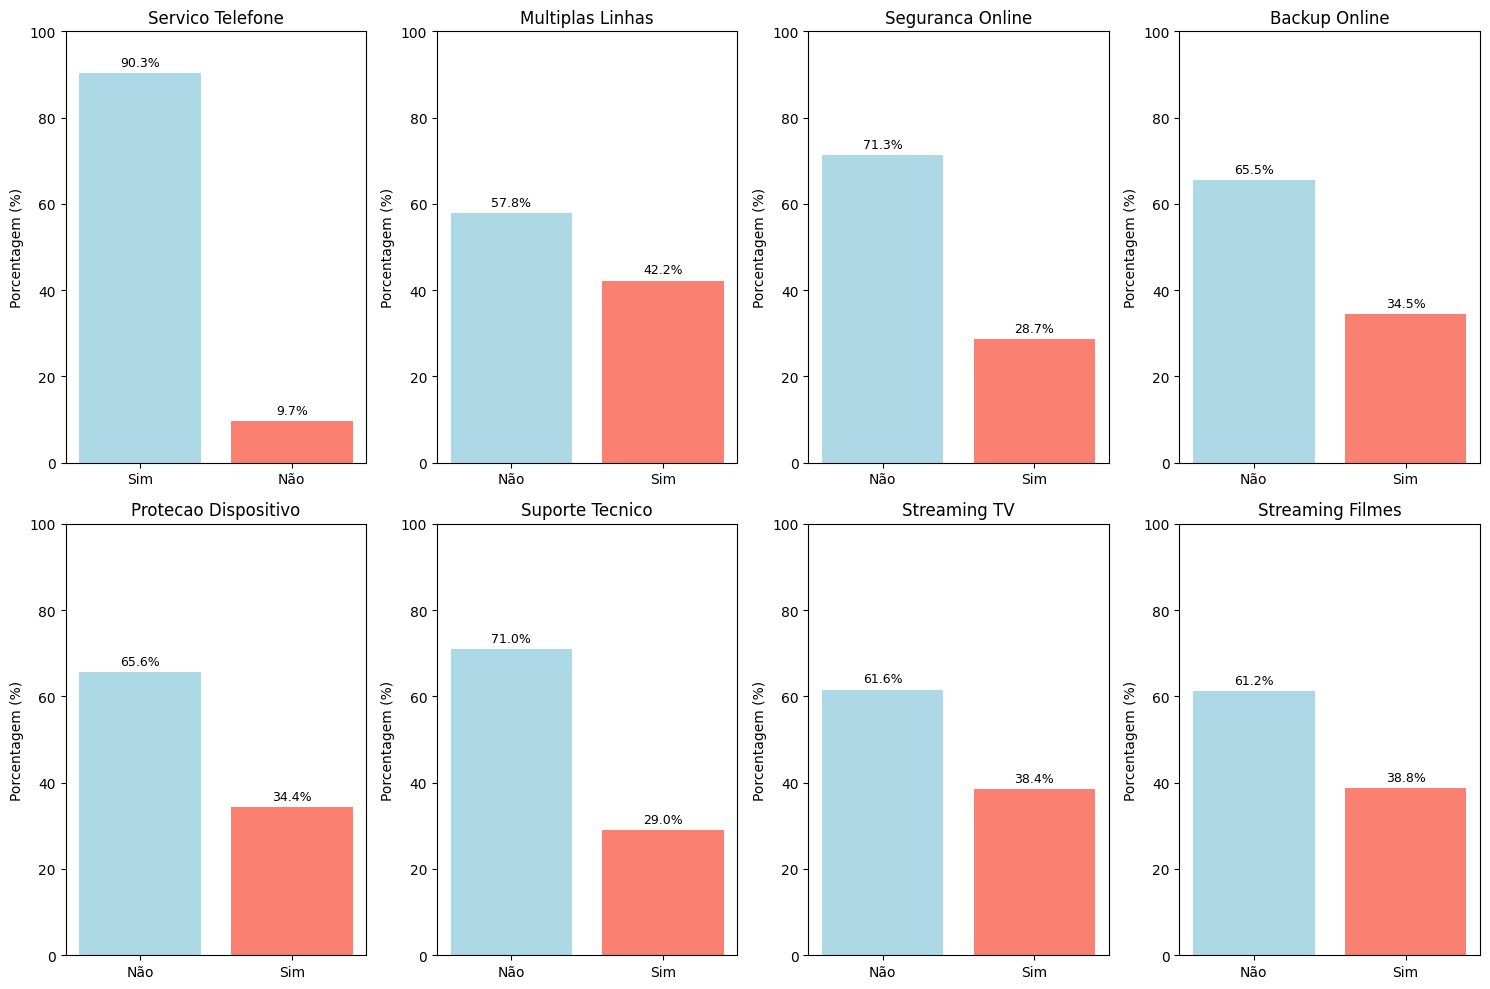

In [84]:
colunas_assinatura = [
    'Servico_Telefone',
    'Multiplas_Linhas',
    'Seguranca_Online',
    'Backup_Online',
    'Protecao_Dispositivo',
    'Suporte_Tecnico',
    'Streaming_TV',
    'Streaming_Filmes'
]

plt.figure(figsize=(15, 10))

for i, col in enumerate(colunas_assinatura):
    plt.subplot(2, 4, i + 1)
    porcentagens = df[col].value_counts(normalize=True) * 100
    porcentagens.index = porcentagens.index.map({True: 'Sim', False: 'Não'})
    bars = plt.bar(porcentagens.index, porcentagens.values, color=['lightblue', 'salmon'])
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%',
                 ha='center', va='bottom', fontsize=9)

    plt.ylim(0, 100)
    plt.title(col.replace('Assinatura_', '').replace('_', ' '))
    plt.xlabel('')
    plt.ylabel('Porcentagem (%)')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


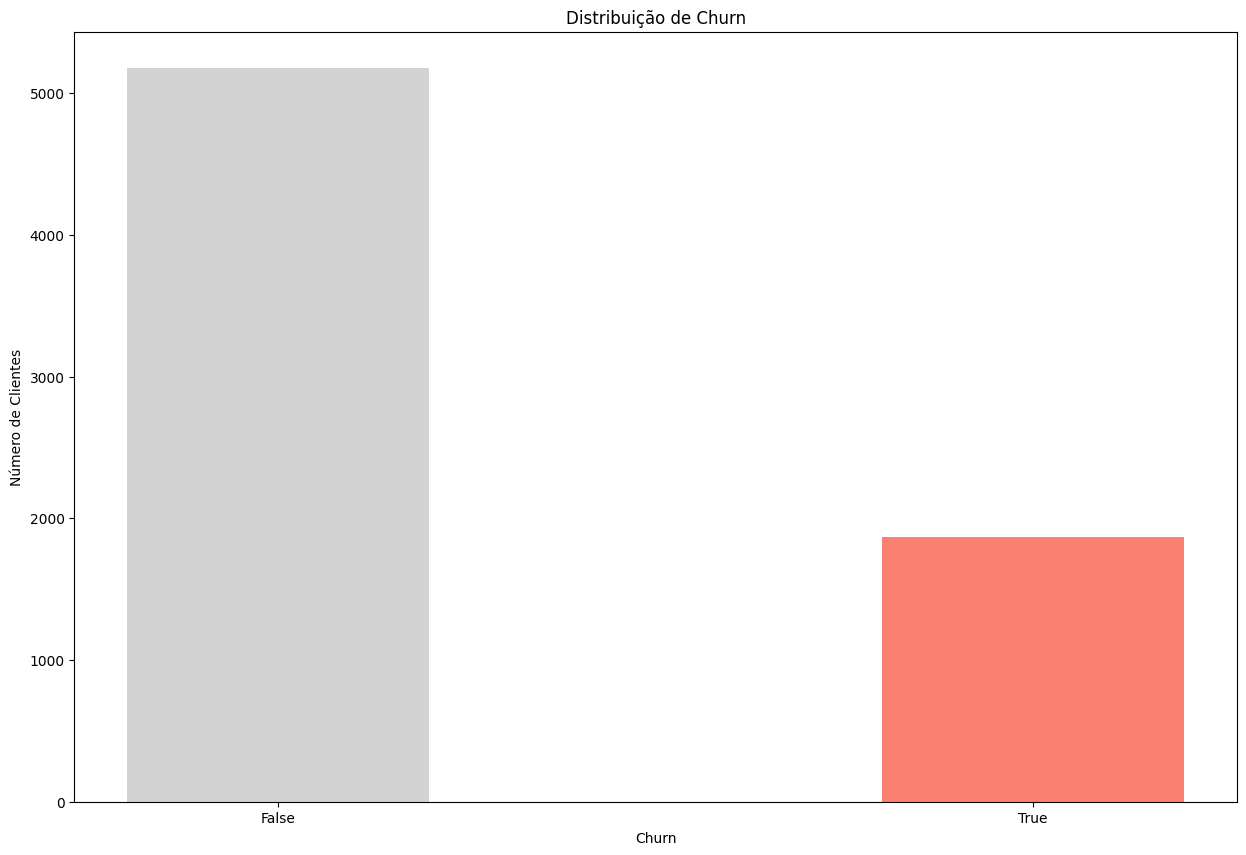

In [93]:
churn_counts = df['Churn'].value_counts()

colors = ['lightgrey' if not churn else 'salmon' for churn in churn_counts.index]

plt.figure(figsize=(15, 10))
plt.bar(churn_counts.index.astype(str), churn_counts.values, color=colors, width=0.4)

plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.title('Distribuição de Churn')

plt.show()

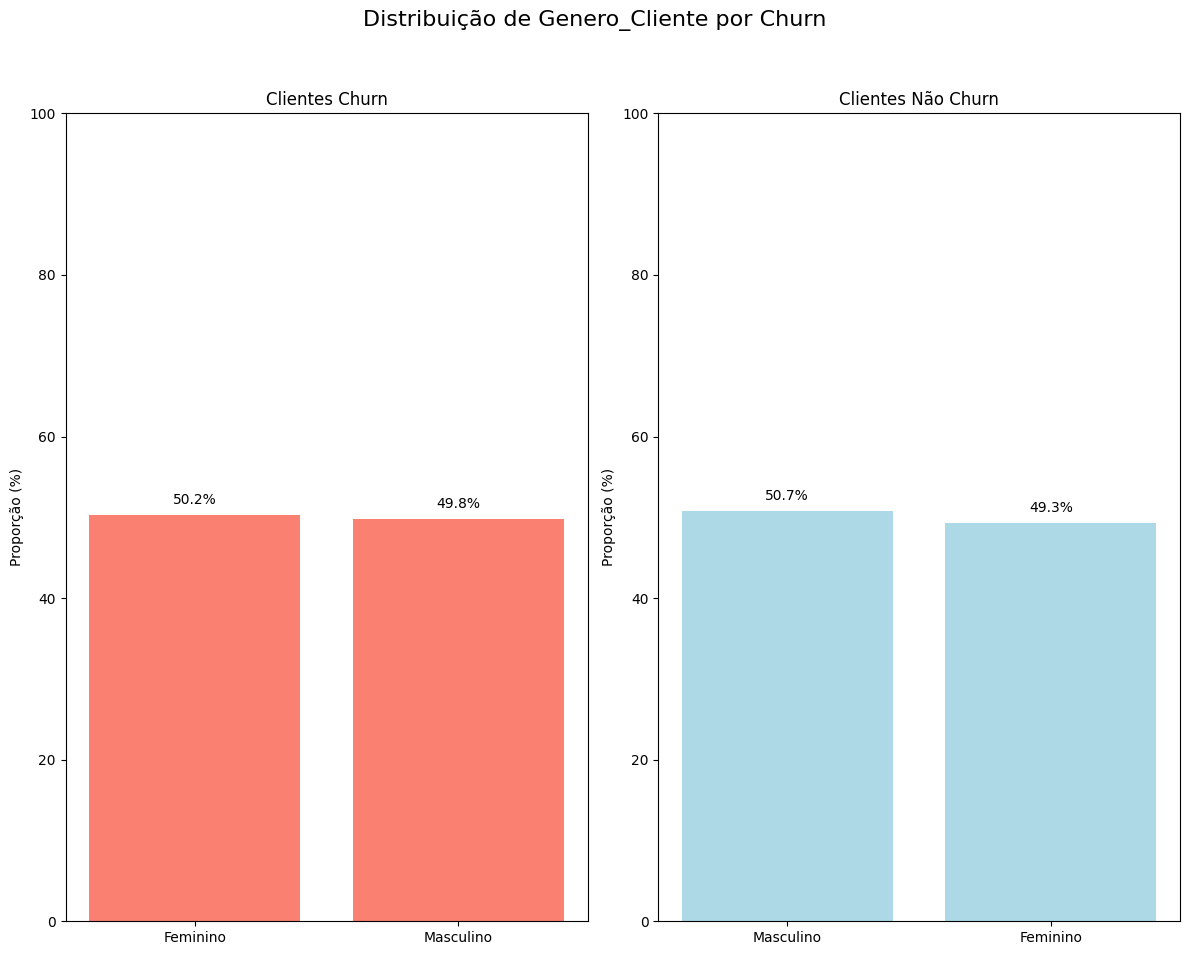

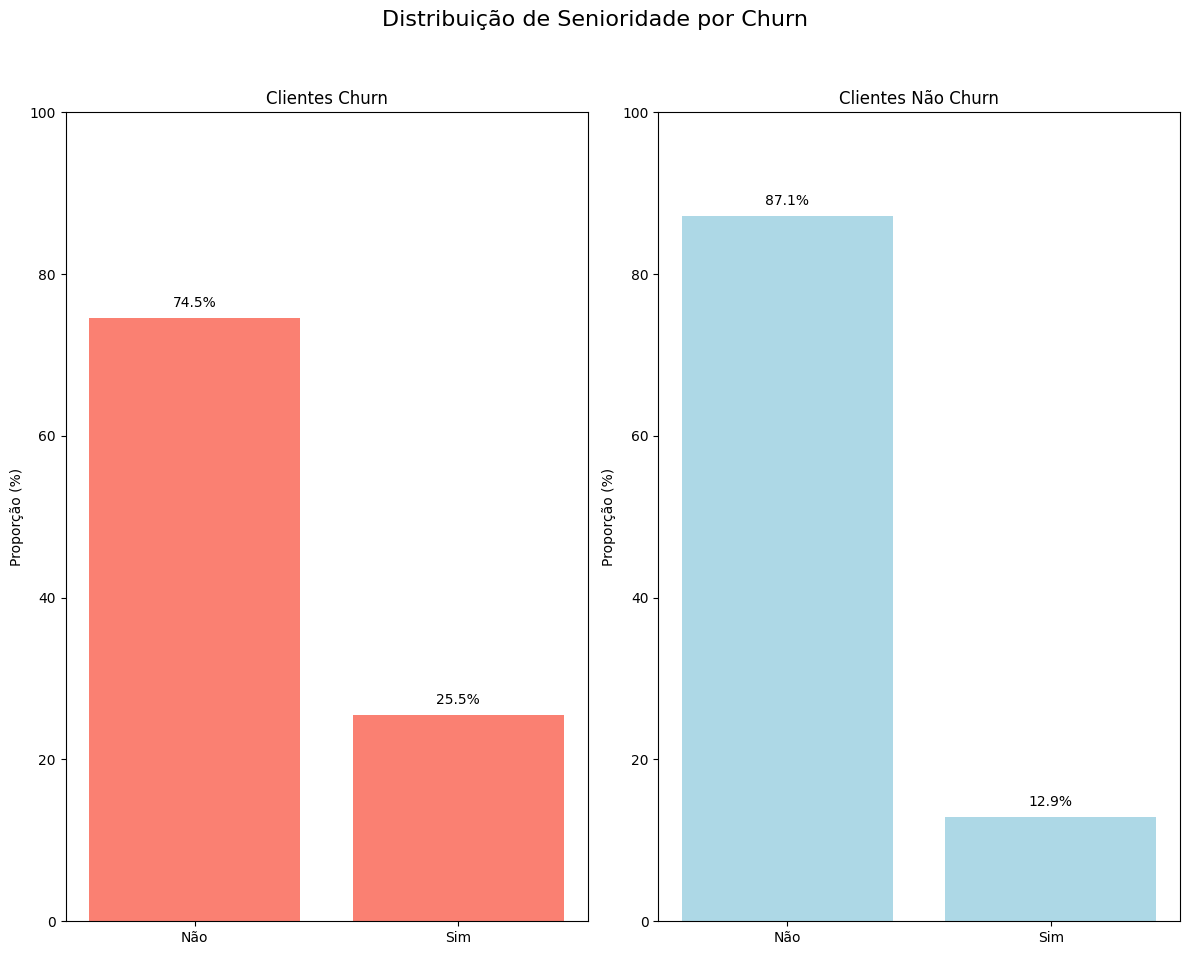

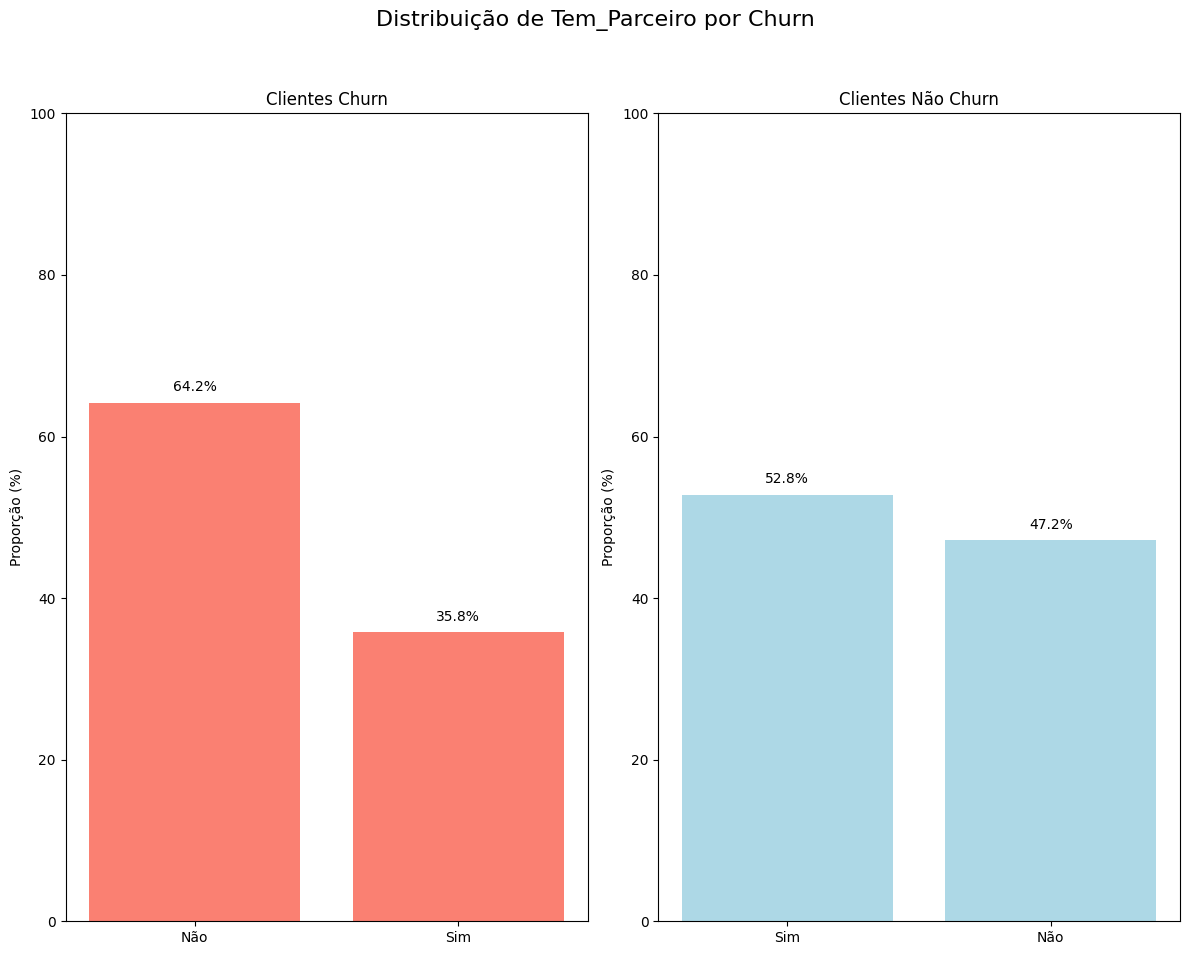

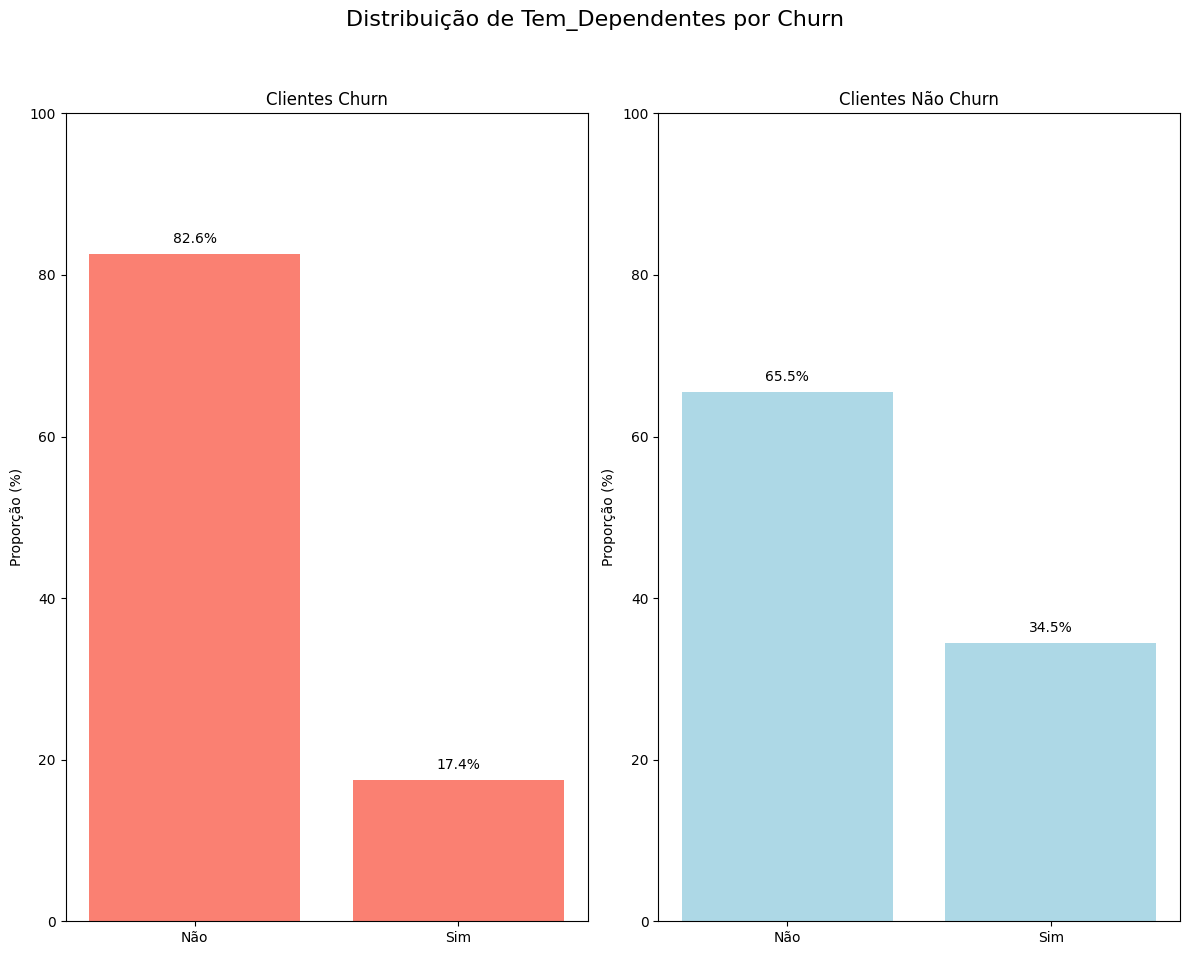

In [95]:
# gráficos de barras relacionando Genero_Cliente, Senioridade, Tem_Parceiro e Tem_Dependentes a distribuição de Churn
colunas_interesse = ['Genero_Cliente', 'Senioridade', 'Tem_Parceiro', 'Tem_Dependentes']

for coluna in colunas_interesse:
    fig, axes = plt.subplots(1, 2, figsize=(12, 10))
    fig.suptitle(f'Distribuição de {coluna} por Churn', fontsize=16)
    df_churn_true = df[df['Churn'] == True]
    counts_true = df_churn_true[coluna].value_counts(normalize=True) * 100
    counts_true.index = counts_true.index.map({True: 'Sim', False: 'Não', 'Male': 'Masculino', 'Female': 'Feminino'})
    bars_true = axes[0].bar(counts_true.index, counts_true.values, color='salmon')
    axes[0].set_title('Clientes Churn')
    axes[0].set_ylabel('Proporção (%)')
    axes[0].set_ylim(0, 100)
    axes[0].tick_params(axis='x', rotation=0)
    for bar in bars_true:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%',
                ha='center', va='bottom')

    df_churn_false = df[df['Churn'] == False]
    counts_false = df_churn_false[coluna].value_counts(normalize=True) * 100
    counts_false.index = counts_false.index.map({True: 'Sim', False: 'Não', 'Male': 'Masculino', 'Female': 'Feminino'})


    bars_false = axes[1].bar(counts_false.index, counts_false.values, color='lightblue')
    axes[1].set_title('Clientes Não Churn')
    axes[1].set_ylabel('Proporção (%)')
    axes[1].set_ylim(0, 100)
    axes[1].tick_params(axis='x', rotation=0)
    for bar in bars_false:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%',
                ha='center', va='bottom')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

/tmp/ipython-input-194883257.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = df_temp.groupby(['Faixa_Tempo', 'Churn']).size().unstack(fill_value=0)


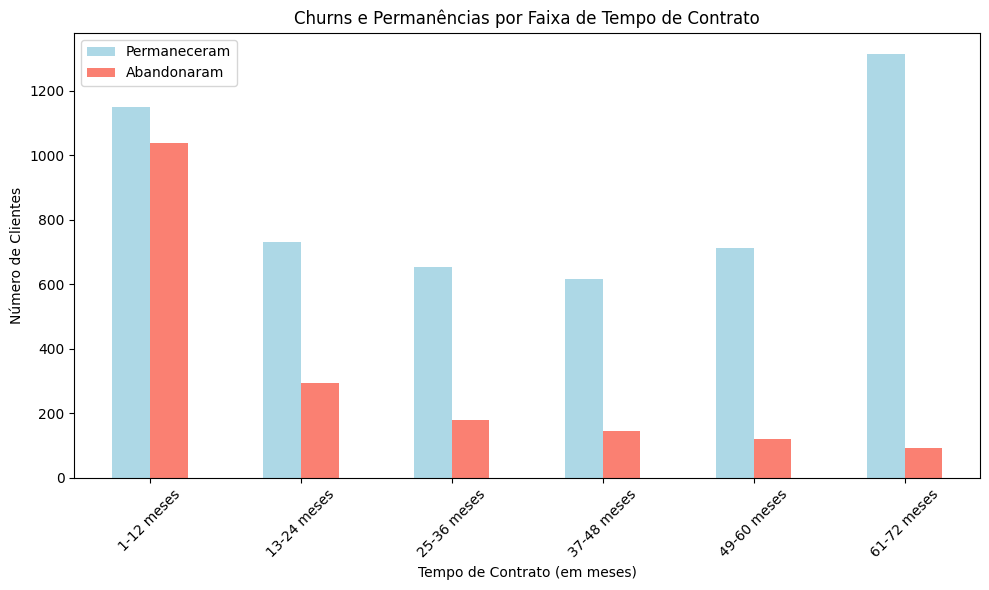

In [97]:
bins = range(0, df['Meses_Cliente'].max() + 12, 12)
labels = [f'{i+1}-{i+12} meses' for i in bins[:-1]]

faixas_tempo = pd.cut(df['Meses_Cliente'], bins=bins, labels=labels, right=True, include_lowest=True)
df_temp = pd.DataFrame({'Faixa_Tempo': faixas_tempo, 'Churn': df['Churn']})
contagem = df_temp.groupby(['Faixa_Tempo', 'Churn']).size().unstack(fill_value=0)

contagem.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title('Churns e Permanências por Faixa de Tempo de Contrato')
plt.xlabel('Tempo de Contrato (em meses)')
plt.ylabel('Número de Clientes')
plt.legend(['Permaneceram', 'Abandonaram'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


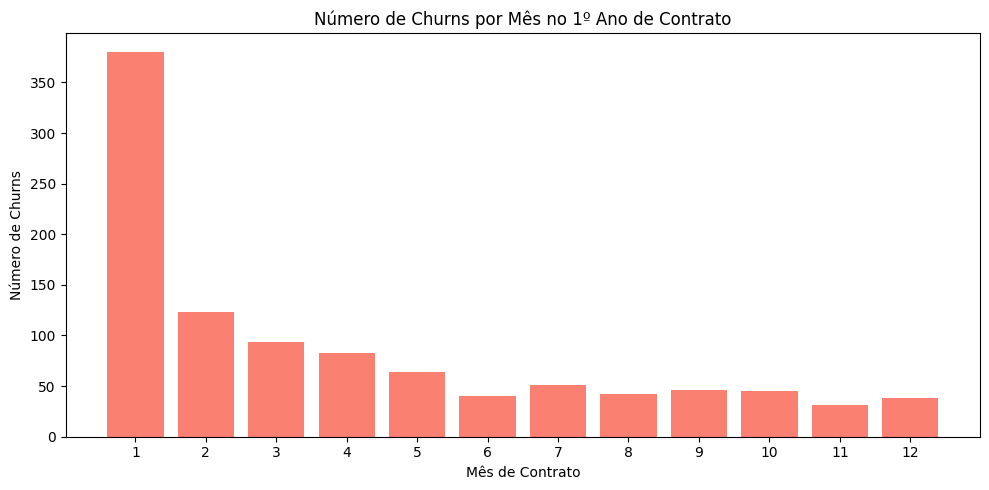

In [98]:
df_primeiro_ano = df[df['Meses_Cliente'] <= 12]
Churn_mensal = df_primeiro_ano[df_primeiro_ano['Churn'] == True]['Meses_Cliente'].value_counts().sort_index()
Churn_mensal = Churn_mensal.reindex(range(1, 13), fill_value=0)

plt.figure(figsize=(10, 5))
plt.bar(Churn_mensal.index, Churn_mensal.values, color='salmon')
plt.title('Número de Churns por Mês no 1º Ano de Contrato')
plt.xlabel('Mês de Contrato')
plt.ylabel('Número de Churns')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

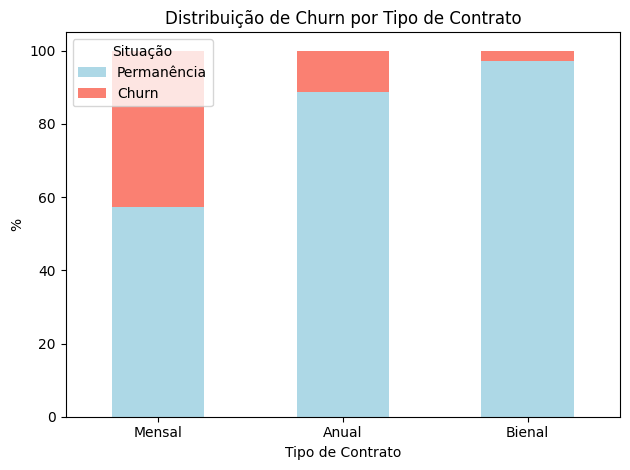

In [101]:
contrato_Churn = df.groupby('Tipo_Contrato')['Churn'].value_counts(normalize=True).unstack() * 100
contrato_Churn = contrato_Churn.rename(columns={True: 'Churn', False: 'Permanência'}).fillna(0)
contrato_Churn = contrato_Churn[['Permanência', 'Churn']]

contrato_Churn.index = contrato_Churn.index.map({
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': 'Bienal'
})

plt.figure(figsize=(8, 6))
contrato_Churn.plot(
    kind='bar',
    stacked=True,
    color=['lightblue', 'salmon']
)

plt.title('Distribuição de Churn por Tipo de Contrato')
plt.ylabel('%')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=0)
plt.legend(title='Situação')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

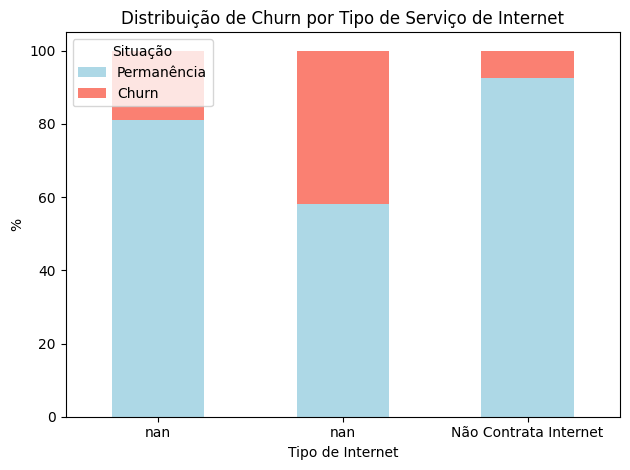

In [103]:
internet_Churn = df.groupby('Servico_Internet')['Churn'].value_counts(normalize=True).unstack() * 100
internet_Churn = internet_Churn.rename(columns={True: 'Churn', False: 'Permanência'}).fillna(0)
internet_Churn = internet_Churn[['Permanência', 'Churn']]

internet_Churn.index = internet_Churn.index.map({
    'No': 'Não Contrata Internet'
})

plt.figure(figsize=(8, 6))
internet_Churn.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])

plt.title('Distribuição de Churn por Tipo de Serviço de Internet')
plt.ylabel('%')
plt.xlabel('Tipo de Internet')
plt.xticks(rotation=0)
plt.legend(title='Situação')
plt.tight_layout()
plt.show()

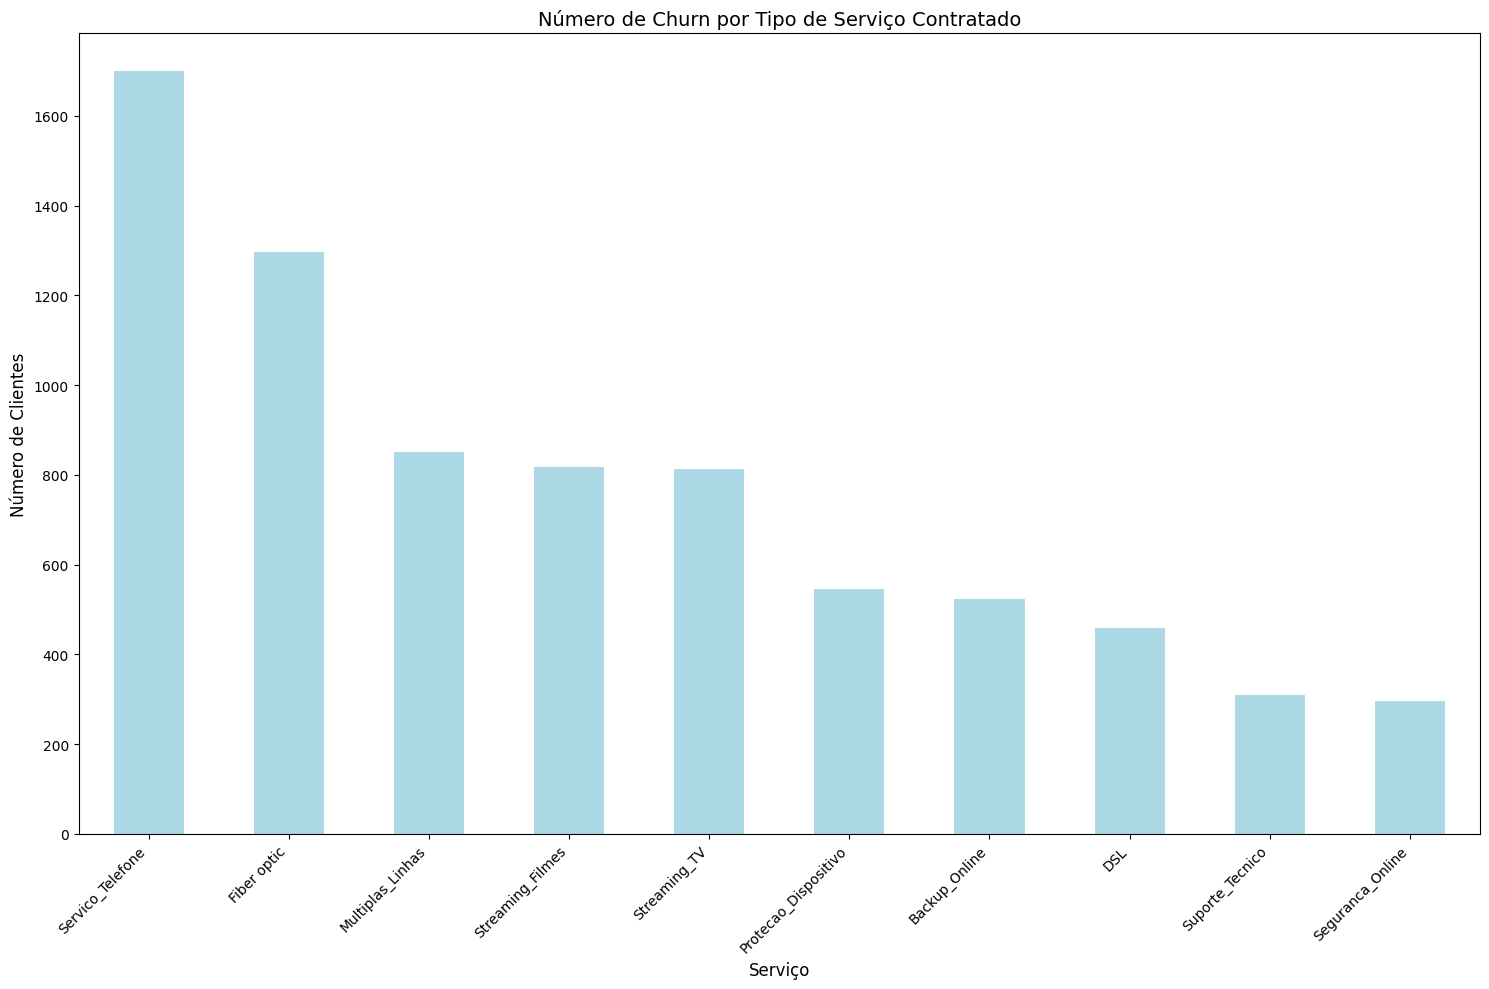

In [105]:
df_Churn = df[df['Churn'] == True].copy()

colunas_servicos_binarias = [
    'Servico_Telefone',
    'Multiplas_Linhas',
    'Seguranca_Online',
    'Backup_Online',
    'Protecao_Dispositivo',
    'Suporte_Tecnico',
    'Streaming_TV',
    'Streaming_Filmes'
]

servicos_Churn = df_Churn[colunas_servicos_binarias].sum().sort_values(ascending=False)
internet_Churn = df_Churn['Servico_Internet'].value_counts()
if 'No' in internet_Churn.index:
    internet_Churn = internet_Churn.drop('No')

todos_servicos_Churn = pd.concat([servicos_Churn, internet_Churn])
todos_servicos_Churn = todos_servicos_Churn.sort_values(ascending=False)

plt.figure(figsize=(15, 10))
todos_servicos_Churn.plot(kind='bar', color='lightblue')
plt.title('Número de Churn por Tipo de Serviço Contratado', fontsize=14)
plt.xlabel('Serviço', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


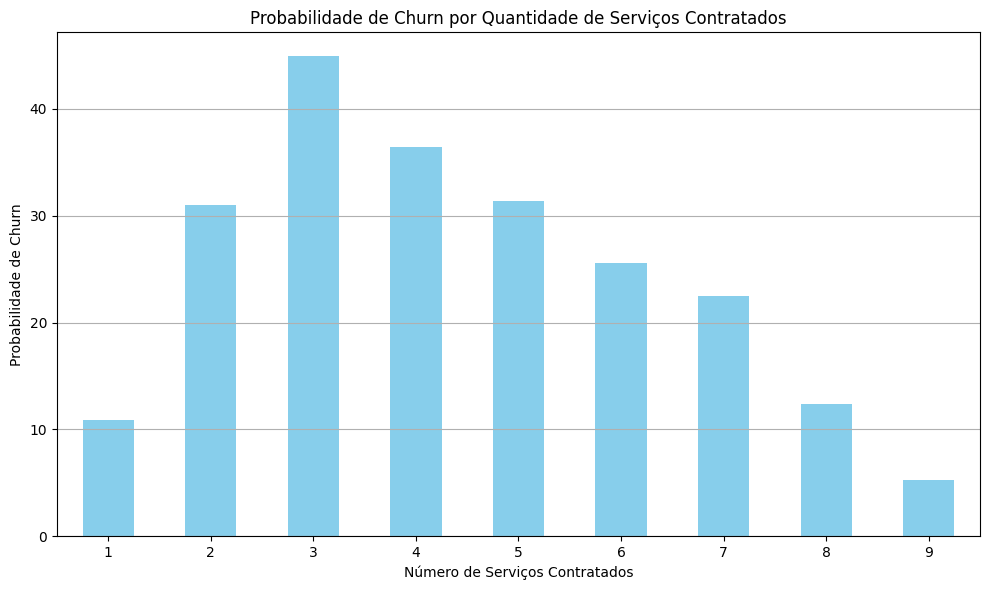

In [106]:
colunas_servicos = [
    'Servico_Telefone',
    'Multiplas_Linhas',
    'Seguranca_Online',
    'Backup_Online',
    'Protecao_Dispositivo',
    'Suporte_Tecnico',
    'Streaming_TV',
    'Streaming_Filmes'
]

numero_servicos = df[colunas_servicos].sum(axis=1) + df['Servico_Internet'].apply(lambda x: 1 if x != 'No' else 0)
df_temp = df[['Churn']].copy()
df_temp['Numero_Servicos'] = numero_servicos
prob_Churn_por_servico = df_temp.groupby('Numero_Servicos')['Churn'].value_counts(normalize=True).unstack().fillna(0)
if True not in prob_Churn_por_servico.columns:
    prob_Churn_por_servico[True] = 0

prob_Churn = prob_Churn_por_servico.rename(columns={True: 'Probabilidade_Churn'})['Probabilidade_Churn'] * 100

plt.figure(figsize=(10, 6))
prob_Churn.plot(kind='bar', color='skyblue')
plt.title('Probabilidade de Churn por Quantidade de Serviços Contratados')
plt.xlabel('Número de Serviços Contratados')
plt.ylabel('Probabilidade de Churn')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

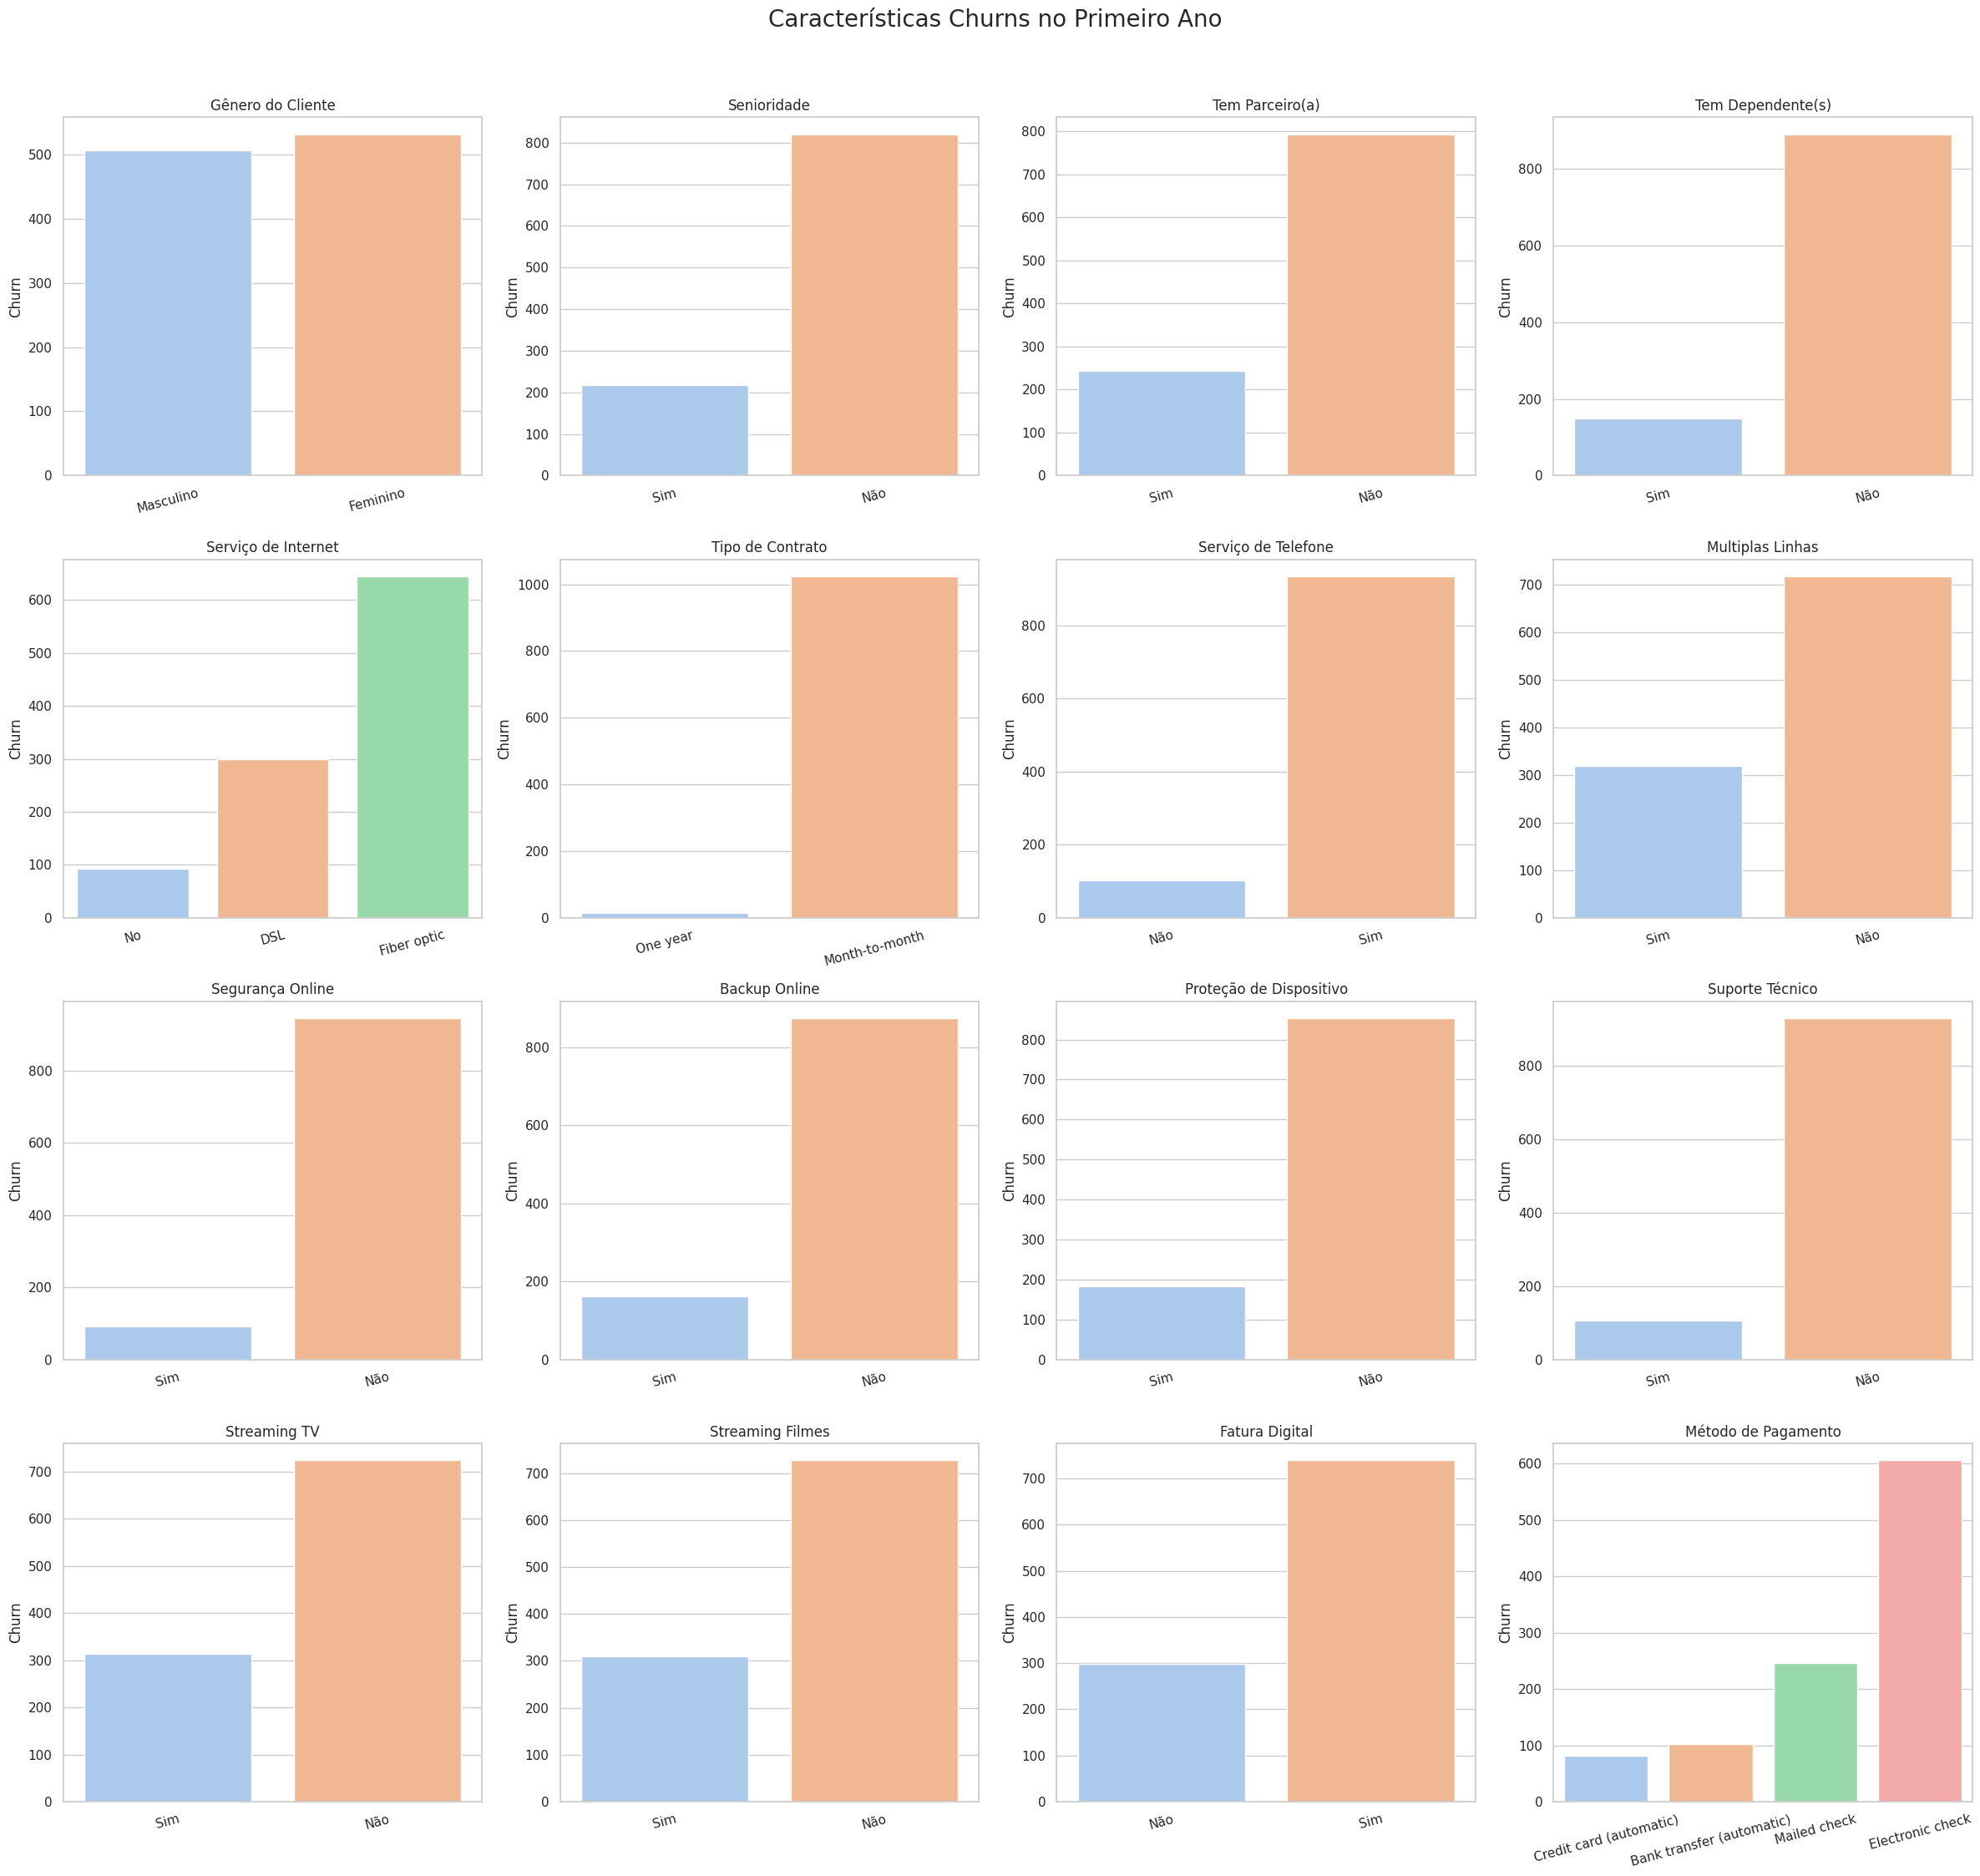

In [107]:
df_Churn_ano1 = df[(df['Meses_Cliente'] <= 12) & (df['Churn'] == True)]

variaveis = [
    'Genero_Cliente', 'Senioridade', 'Tem_Parceiro', 'Tem_Dependentes',
    'Servico_Internet', 'Tipo_Contrato',
    'Servico_Telefone', 'Multiplas_Linhas',
    'Seguranca_Online', 'Backup_Online',
    'Protecao_Dispositivo', 'Suporte_Tecnico',
    'Streaming_TV', 'Streaming_Filmes',
    'Fatura_Digital', 'Metodo_Pagamento'
]

titulos_legiveis = [
    'Gênero do Cliente', 'Senioridade', 'Tem Parceiro(a)', 'Tem Dependente(s)',
    'Serviço de Internet', 'Tipo de Contrato',
    'Serviço de Telefone', 'Multiplas Linhas',
    'Segurança Online', 'Backup Online',
    'Proteção de Dispositivo', 'Suporte Técnico',
    'Streaming TV', 'Streaming Filmes',
    'Fatura Digital', 'Método de Pagamento'
]

plt.figure(figsize=(24, 22))
sns.set(style='whitegrid')

for i, var in enumerate(variaveis):
    plt.subplot(4, 4, i + 1)
    dados = df_Churn_ano1[var].replace({
        True: 'Sim', False: 'Não',
        'Male': 'Masculino', 'Female': 'Feminino'
    })
    contagem = dados.value_counts().sort_values()
    sns.barplot(x=contagem.index, y=contagem.values, hue=contagem.index, palette='pastel', legend=False)
    plt.title(titulos_legiveis[i])
    plt.ylabel('Churn')
    plt.xlabel('')
    plt.xticks(rotation=15)

plt.suptitle('Características Churns no Primeiro Ano', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


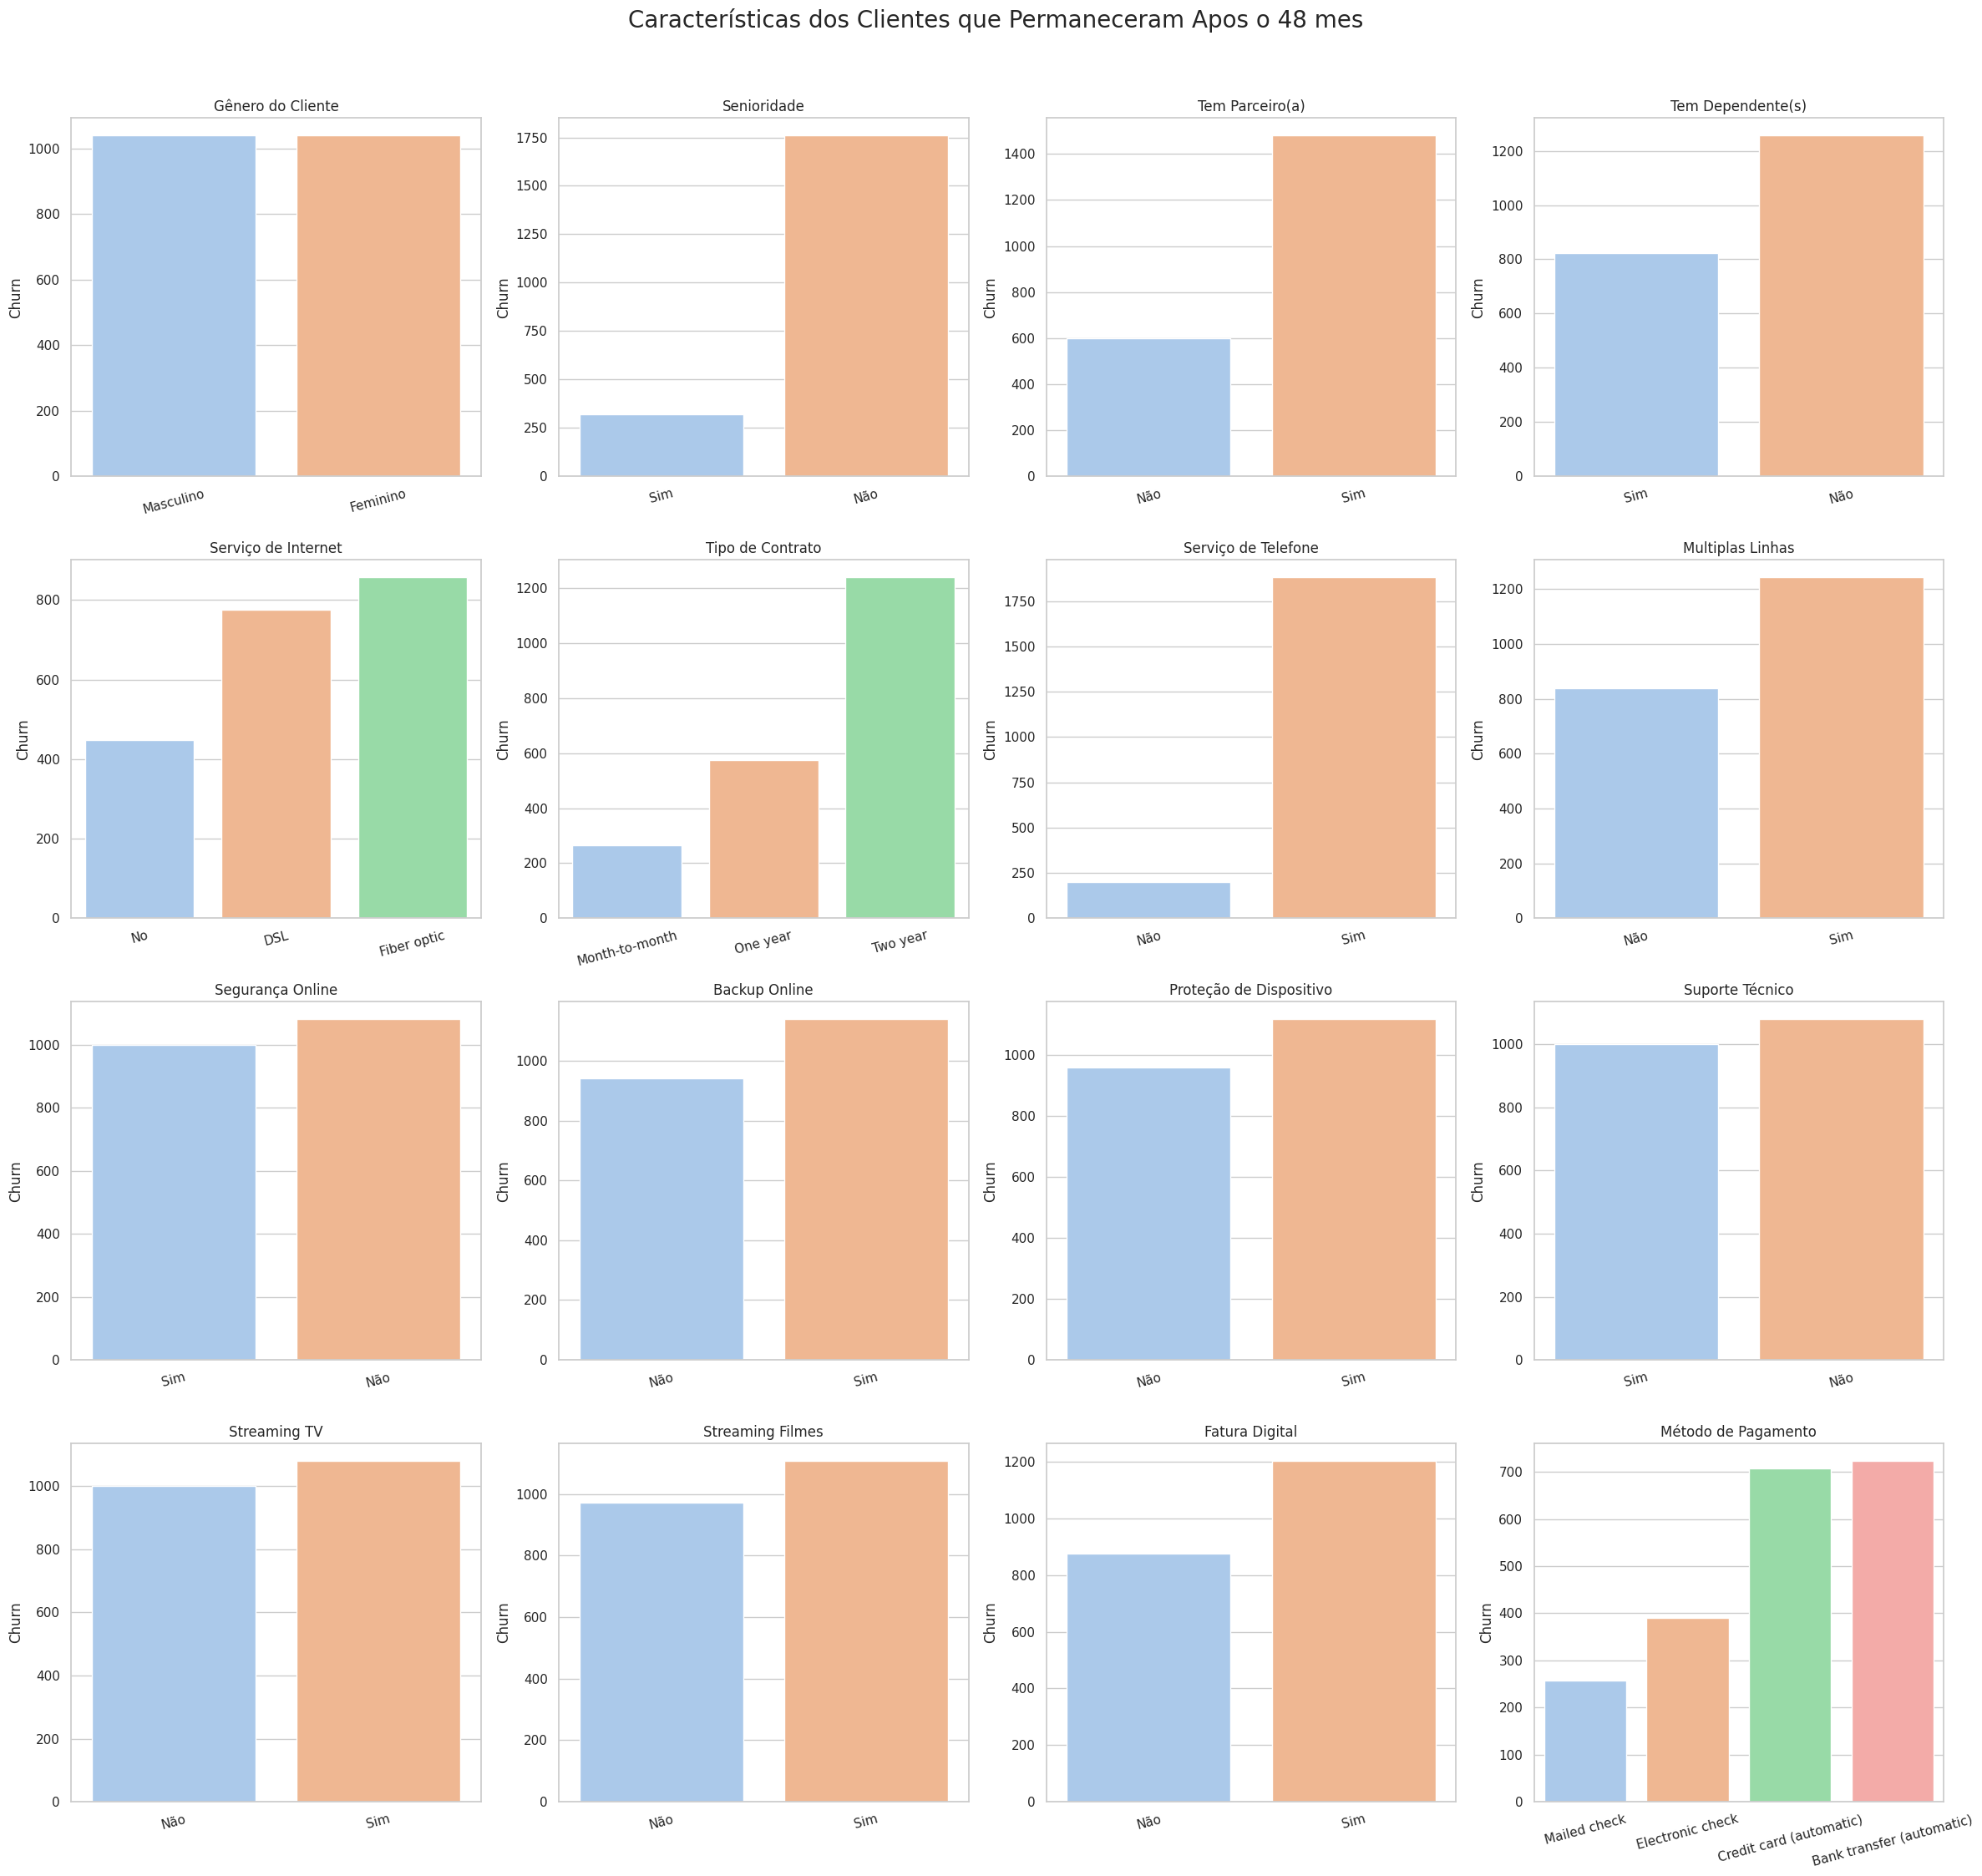

In [110]:
df_Churn_ano1 = df[(df['Meses_Cliente'] >= 48) & (df['Churn'] == False)]

variaveis = [
    'Genero_Cliente', 'Senioridade', 'Tem_Parceiro', 'Tem_Dependentes',
    'Servico_Internet', 'Tipo_Contrato',
    'Servico_Telefone', 'Multiplas_Linhas',
    'Seguranca_Online', 'Backup_Online',
    'Protecao_Dispositivo', 'Suporte_Tecnico',
    'Streaming_TV', 'Streaming_Filmes',
    'Fatura_Digital', 'Metodo_Pagamento'
]

titulos_legiveis = [
    'Gênero do Cliente', 'Senioridade', 'Tem Parceiro(a)', 'Tem Dependente(s)',
    'Serviço de Internet', 'Tipo de Contrato',
    'Serviço de Telefone', 'Multiplas Linhas',
    'Segurança Online', 'Backup Online',
    'Proteção de Dispositivo', 'Suporte Técnico',
    'Streaming TV', 'Streaming Filmes',
    'Fatura Digital', 'Método de Pagamento'
]


plt.figure(figsize=(24, 22))
sns.set(style='whitegrid')

for i, var in enumerate(variaveis):
    plt.subplot(4, 4, i + 1)
    dados = df_Churn_ano1[var].replace({
        True: 'Sim', False: 'Não',
        'Male': 'Masculino', 'Female': 'Feminino'
    })
    contagem = dados.value_counts().sort_values()
    sns.barplot(x=contagem.index, y=contagem.values, hue=contagem.index, palette='pastel', legend=False)
    plt.title(titulos_legiveis[i])
    plt.ylabel('Churn')
    plt.xlabel('')
    plt.xticks(rotation=15)

plt.suptitle('Características dos Clientes que Permaneceram Apos o 48 mes', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

#**Relatório de Análise de Evasão de Clientes (Churn)**

Este documento apresenta o processo de análise de dados conduzido para compreender os fatores que influenciam a evasão de clientes **(Churn)** na empresa de telecomunicações TelecomX. O objetivo central é identificar padrões e comportamentos que levam ao cancelamento dos serviços, oferecendo insights práticos para apoiar estratégias de retenção.

##**Introdução**
A perda de clientes, conhecida como Churn, constitui um desafio estratégico para empresas do setor de telecomunicações. Além de reduzir diretamente a receita, pode elevar os custos de aquisição de novos consumidores e afetar negativamente a reputação da marca. Entender as razões que motivam o desligamento é essencial para desenvolver ações de retenção eficazes e assegurar a sustentabilidade do negócio.

Neste projeto, foi realizada uma análise exploratória sobre o conjunto de dados de clientes da TelecomX com os seguintes objetivos:

- Identificar características associadas ao abandono do serviço.

- Examinar a distribuição de variáveis relevantes e suas relações com o Churn.

- Propor recomendações baseadas em evidências para reduzir a taxa de evasão.

##**Preparação e Tratamento dos Dados**

Para garantir consistência e confiabilidade nas análises, foram aplicadas etapas de pré-processamento:

- Importação dos dados.

- Identificação e correção de valores ausentes.

- Ajuste de variáveis booleanas e categóricas para formatos apropriados.

#**Análise Exploratória de Dados**

Diversas técnicas de visualização e exploração foram utilizadas para compreender melhor o comportamento dos clientes.

##**Análise Temporal**
A maior parte dos cancelamentos ocorre nos primeiros 12 meses, com destaque para o 1º mês de contrato.

Histogramas confirmaram essa tendência de evasão inicial.

##**Serviços Contratados**
Não foi identificada diferença significativa no número de serviços contratados entre clientes que permaneceram e os que cancelaram.

A adesão ou ausência de serviços adicionais (streaming, backup online, segurança digital) não apresentou correlação relevante com o Churn.

Assim, a quantidade de serviços contratados isoladamente não se mostra um fator determinante para a evasão.

##**Correlação com Variáveis Numéricas**
Foram comparados indicadores como Custo Diário, Mensalidade e Total Cobrado.

A matriz de correlação revelou relação fraca a moderada entre Total Cobrado e abandono, principalmente porque os desligamentos ocorrem nos primeiros meses.

##**Conclusões e Insights**
Clientes no primeiro mês de contrato apresentam a maior taxa de evasão, sugerindo falhas na experiência inicial.

Idosos e clientes com dependentes demonstram menor propensão ao abandono.

A permanência prolongada reduz a probabilidade de cancelamento, especialmente após o primeiro ano.

Variáveis financeiras (Mensalidade, Total Cobrado, Custo Diário) não se destacam como fatores decisivos para o Churn.

Contratos mensais registram maior evasão, indicando que a flexibilidade facilita a saída precoce.

Planos de longo prazo (1 ou 2 anos, sobretudo os bienais) estão associados a maior retenção.

Pagamentos automáticos (débito em conta ou cartão de crédito) reduzem a taxa de evasão.

Clientes que optam por meios manuais (boleto, cheque eletrônico) tendem a cancelar com mais frequência.

#**Recomendações**
1. Fortalecer a Experiência Inicial do Cliente

A primeira impressão é determinante. Cancelamentos no primeiro mês representam a maior parcela da evasão e geram custos operacionais adicionais (instalação, suporte inicial, emissão de cobranças).

Implementar um processo de onboarding estruturado, com boas-vindas personalizadas, tutoriais simples e suporte proativo.

Monitorar os primeiros 30 dias com pesquisas rápidas de satisfação e ações preventivas.

2. Incentivar Planos de Longo Prazo
Oferecer descontos e benefícios exclusivos em contratos anuais ou bienais, como pacotes adicionais, bônus em mensalidades ou prioridade no atendimento.

Evidenciar vantagens da fidelização já no momento da adesão, tanto em canais digitais quanto na equipe de vendas.

3. Estimular Pagamentos Automáticos
Promover cartão de crédito e débito automático como opções preferenciais, com benefícios como:

- Descontos especiais;

- Participação em programas de fidelidade;

- Maior praticidade e menor burocracia.

- Orientar o cliente sobre as vantagens do pagamento automático durante a contratação e no pós-venda.

4. Reduzir a Evasão Precoce
Criar barreiras leves contra o desligamento inicial, como:

- Períodos mínimos contratuais com benefícios condicionais;

